<a href="https://colab.research.google.com/github/PARKHYOUNJUNG/phj_lms23/blob/main/CODE/PHJ_9days.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)     

In [9]:
# GOMS2019.csv 파일을 읽어오기
df = pd.read_csv('https://raw.githubusercontent.com/zzhining/public_data_analysis/main/dataset/GOMS2019.csv')

# 열 이름 정보 담은 파일 불러오기
df_columns = pd.read_csv('https://raw.githubusercontent.com/zzhining/public_data_analysis/main/dataset/GOMS2019_columns.csv')

df.shape, df_columns.shape

((11652, 130), (159, 3))

In [4]:
df.head()

,이직여부,majorcat,school,area,sex,age,graduy,a001,industry,job,a010,a011,a012,a014,a016,a018,a020,a021,a116,a117,a118,a119,a122,a125,a126,a127,a128,a129,a130,a131,a132,a133,a134,a135,a136,a137,a138,a139,a140,a141,a142,a143,a144,a145,a146,a151,a153,a158,a159,a160,...,f124,f138,g001,h001,i018,i050,j021,l001,n083,k001,k042,k043,k044,k045,k046,k047,k048,k049,k050,k051,k052,k053,k055,k056,k057,q015,q016,q017,p001,p014,p016,p017,p018,p020,p024,p028z,p031z,p035,p036,p046,p039,p041,p043,p045,r023,r024,r025,r026,r027,wt
0,2,1,1,8,1,21.750000,2018,2018,7,7,-1,3,1,8,1,0,1,1,5.0,25,0,0,112,112,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,6,1,2,2,1,2,1,...,2,2,2,1,2,1,2200,2,2,1,4,5,4,4,4,3,4,4,4,3,4,2,3,4,4,6,6,6,1,1,3,4,1,10,8,3,3,6,4,1,1008,2,2,6,30,0,0,0,1,20.945343
1,1,1,1,8,1,25.250000,2018,2018,7,1,2,2,1,1,6,1,1,1,5.0,45,3,5,180,180,2,2,3,3,2,3,2,2,2,2,2,3,3,2,2,2,2,3,3,6,3,5,1,1,2,1,...,1,2,2,1,2,1,2040,2,2,2,5,5,5,5,5,5,5,5,4,4,4,3,5,4,4,3,3,3,1,1,4,5,1,1,8,3,3,3,3,1,540,2,2,3,60,10,0,10,1,19.420393
2,2,1,1,8,1,24.500000,2018,2018,9,1,6,6,1,1,6,1,1,1,5.0,40,10,8,180,170,1,5,4,5,5,4,5,5,5,3,4,3,5,4,4,5,3,2,4,6,5,5,2,1,2,1,...,2,2,2,1,2,2,2000,1,2,1,5,5,5,5,4,5,5,3,5,4,5,1,5,2,2,6,7,7,1,1,3,2,1,5,5,3,3,6,4,1,1570,2,2,2,30,0,0,0,1,19.420393
3,2,1,1,10,1,26.000000,2018,2018,3,7,5,5,1,10,2,0,1,1,5.0,40,4,0,260,250,4,5,4,3,4,3,5,4,4,1,3,2,1,4,5,5,2,3,1,6,1,1,2,1,2,1,...,2,2,2,1,2,1,2600,2,2,2,5,5,5,3,4,5,4,5,5,5,5,1,5,1,1,1,7,4,1,2,1,1,1,10,10,6,5,7,4,3,1560,2,1,2,150,35,0,0,1,11.549823
4,2,1,1,1,2,25.083333,2017,2019,7,7,2,2,1,8,8,0,1,2,6.0,50,2,4,240,240,3,2,4,4,3,2,4,2,2,2,3,3,4,3,3,3,2,1,1,6,2,2,2,2,2,2,...,2,2,2,1,2,2,2500,2,2,2,5,4,4,3,4,4,5,5,5,4,4,3,4,3,3,5,6,4,1,2,6,2,1,1,8,3,1,6,1,3,0,2,-1,1,120,50,0,0,1,37.668984


In [18]:
df_columns.head()

,columns,desc,label
0,majorcat,전공계열,"인문1, 사회2, 교육3, 공학4, 자연5, 의약6, 예체능7"
1,school,학교유형,"2~3년제(1), 4년제(2), 교육대(3)"
2,area,학교소재지,"서울1,부산2,대구3,대전4,인천5,광주6,울산7,경기8,강원9,충북10,충남11,..."
3,sex,성별,"남1, 여2"
4,age,연령,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Columns: 130 entries, 이직여부 to wt
dtypes: float64(4), int64(126)
memory usage: 11.6 MB


In [6]:
df.describe()

,이직여부,majorcat,school,area,sex,age,graduy,a001,industry,job,a010,a011,a012,a014,a016,a018,a020,a021,a116,a117,a118,a119,a122,a125,a126,a127,a128,a129,a130,a131,a132,a133,a134,a135,a136,a137,a138,a139,a140,a141,a142,a143,a144,a145,a146,a151,a153,a158,a159,a160,...,f124,f138,g001,h001,i018,i050,j021,l001,n083,k001,k042,k043,k044,k045,k046,k047,k048,k049,k050,k051,k052,k053,k055,k056,k057,q015,q016,q017,p001,p014,p016,p017,p018,p020,p024,p028z,p031z,p035,p036,p046,p039,p041,p043,p045,r023,r024,r025,r026,r027,wt
count,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.0,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,...,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.0,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000
mean,1.785530,3.802437,1.817628,6.873326,1.418126,26.879692,2017.816083,2017.829557,10.862599,3.240474,4.673361,4.347322,1.0,6.142379,3.213526,0.218675,2.349897,1.259955,5.044971,40.711552,3.128991,0.538363,245.312908,221.610196,3.286389,3.810676,3.802866,3.884827,3.740474,3.664693,3.855561,3.581102,3.311878,3.717044,3.757381,3.732149,3.780467,3.588826,3.625472,3.682973,3.029866,3.053725,3.340628,5.473653,3.372726,2.878647,1.648215,1.245966,2.268967,1.162032,...,1.860110,1.908514,1.896928,1.401219,1.657484,1.957518,2942.006351,1.733608,1.836852,1.564796,4.407484,4.356162,4.361483,3.731377,3.724682,3.960522,4.273344,4.275489,4.329042,4.251202,4.175077,3.437779,3.846979,3.643323,3.640062,5.338054,5.470134,5.234895,1.056728,1.531153,2.125815,2.483093,1.0,6.743821,6.421215,3.862685,3.548575,4.907484,3.240817,2.175077,2023.725712,1.874785,1.734895,1.934861,90.796258,17.103673,7.432029,7.392207,1.073292,27.303291
std,0.410472,1.769656,0.427717,4.856847,0.493272,4.467500,0.387433,2.240143,5.190021,2.448687,3.472896,2.820669,0.0,4.877583,2.024881,0.435015,1.996961,0.816300,0.445746,7.086318,5.367781,1.467113,105.989095,94.868042,0.993124,0.932829,0.867211,0.877798,1.009320,0.998194,0.908571,1.008860,0.951878,0.863139,0.912680,0.850464,0.923772,0.953789,0.843803,0.831164,0.687293,0.667705,1.257816,1.237170,1.154759,1.256497,0.477548,0.524489,0.572228,0.453870,...,0.346888,0.288312,0.304067,0.490166,0.474572,0.201695,941.177686,0.442091,0.369516,0.495805,0.632921,0.663421,0.713507,1.099746,0.855582,0.801886,0.724073,0.725688,0.731857,0.673042,0.734105,1.042315,0.888137,0.962772,0.960485,1.173017,1.124420,1.237558,0.251935,0.499050,1.121016,1.439528,0.0,4.864681,4.678806,1.282923,1.158813,1.955348,1.566325,1.171678,2609.275410,0.478022,0.526044,1.485418,99.663567,66.773162,45.669087,57.890833,0.445021,18.293701
min,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,2017.000000,1983.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0,1.000000,-1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000

◆  데이터 정제

❖  데이터의 결측치 및 이상치 여부 확인

In [11]:
# 결측치 처리
df.isna().sum().sum()
# df.dropna(inplace = True)

0

In [13]:
# 중복값 포함여부를 확인
df.duplicated().sum()
# 중복값 삭제
# df.drop_duplicates()

0

In [17]:
# 이상치 확인
df['f074'].describe()

count    11652.000000
mean         3.613174
std          0.430819
min          1.000000
25%          3.300000
50%          3.700000
75%          3.900000
max          4.500000
Name: f074, dtype: float64

<Axes: >

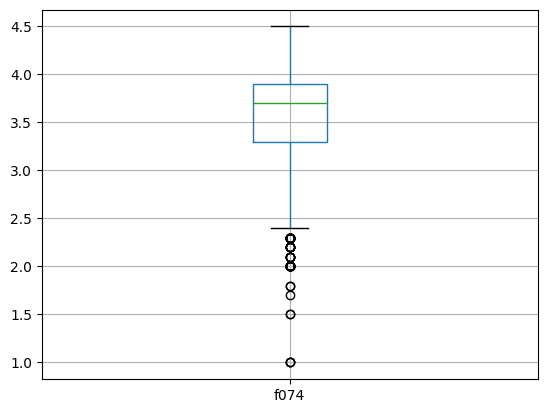

In [19]:
df.boxplot(column=['f074'])

◆  월평균 소득은?

❖  전공별 월평균소득의 통계치 확인

❖  성별, 전공별 월평균소득의 통계치 확인


In [20]:
df.head()

,이직여부,majorcat,school,area,sex,age,graduy,a001,industry,job,a010,a011,a012,a014,a016,a018,a020,a021,a116,a117,a118,a119,a122,a125,a126,a127,a128,a129,a130,a131,a132,a133,a134,a135,a136,a137,a138,a139,a140,a141,a142,a143,a144,a145,a146,a151,a153,a158,a159,a160,...,f124,f138,g001,h001,i018,i050,j021,l001,n083,k001,k042,k043,k044,k045,k046,k047,k048,k049,k050,k051,k052,k053,k055,k056,k057,q015,q016,q017,p001,p014,p016,p017,p018,p020,p024,p028z,p031z,p035,p036,p046,p039,p041,p043,p045,r023,r024,r025,r026,r027,wt
0,2,1,1,8,1,21.750000,2018,2018,7,7,-1,3,1,8,1,0,1,1,5.0,25,0,0,112,112,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,6,1,2,2,1,2,1,...,2,2,2,1,2,1,2200,2,2,1,4,5,4,4,4,3,4,4,4,3,4,2,3,4,4,6,6,6,1,1,3,4,1,10,8,3,3,6,4,1,1008,2,2,6,30,0,0,0,1,20.945343
1,1,1,1,8,1,25.250000,2018,2018,7,1,2,2,1,1,6,1,1,1,5.0,45,3,5,180,180,2,2,3,3,2,3,2,2,2,2,2,3,3,2,2,2,2,3,3,6,3,5,1,1,2,1,...,1,2,2,1,2,1,2040,2,2,2,5,5,5,5,5,5,5,5,4,4,4,3,5,4,4,3,3,3,1,1,4,5,1,1,8,3,3,3,3,1,540,2,2,3,60,10,0,10,1,19.420393
2,2,1,1,8,1,24.500000,2018,2018,9,1,6,6,1,1,6,1,1,1,5.0,40,10,8,180,170,1,5,4,5,5,4,5,5,5,3,4,3,5,4,4,5,3,2,4,6,5,5,2,1,2,1,...,2,2,2,1,2,2,2000,1,2,1,5,5,5,5,4,5,5,3,5,4,5,1,5,2,2,6,7,7,1,1,3,2,1,5,5,3,3,6,4,1,1570,2,2,2,30,0,0,0,1,19.420393
3,2,1,1,10,1,26.000000,2018,2018,3,7,5,5,1,10,2,0,1,1,5.0,40,4,0,260,250,4,5,4,3,4,3,5,4,4,1,3,2,1,4,5,5,2,3,1,6,1,1,2,1,2,1,...,2,2,2,1,2,1,2600,2,2,2,5,5,5,3,4,5,4,5,5,5,5,1,5,1,1,1,7,4,1,2,1,1,1,10,10,6,5,7,4,3,1560,2,1,2,150,35,0,0,1,11.549823
4,2,1,1,1,2,25.083333,2017,2019,7,7,2,2,1,8,8,0,1,2,6.0,50,2,4,240,240,3,2,4,4,3,2,4,2,2,2,3,3,4,3,3,3,2,1,1,6,2,2,2,2,2,2,...,2,2,2,1,2,2,2500,2,2,2,5,4,4,3,4,4,5,5,5,4,4,3,4,3,3,5,6,4,1,2,6,2,1,1,8,3,1,6,1,3,0,2,-1,1,120,50,0,0,1,37.668984


In [46]:
df_columns.head()
df_columns.isna().sum()
df_columns.fillna(0, inplace=True)
df_columns.isna().sum()

columns    0
desc       0
label      0
dtype: int64

In [27]:
# 전공별 월평균소득의 통계치 확인
df.groupby('majorcat')['a122'].mean()

majorcat
1    227.700868
2    248.070490
3    230.889454
4    261.861254
5    236.178799
6    271.418964
7    208.219344
Name: a122, dtype: float64

In [61]:
# 성별, 전공별 월평균소득의 통계치 확인

df.groupby(['sex','majorcat'])['a122'].mean().repalce('majorcat':list(range(1,8)),tag('majorcat'))
df_tag = pd.DataFrame({'major':['인문', '사회', '교육', '공학', '자연', '의약', '예체능'],
                         'majorcat':[1,2,3,4,5,6,7]})

SyntaxError: ignored

In [51]:
# df2 = pd.DataFrame({'group_val' : ['흡연자', '비흡연자']}, index =['yes', 'no'])
# df_columns['label'].iloc[1]
def tag(ind):
  tag = df_columns[df_columns['columns']==ind]['label'].iloc[0].split(', ')
  return tag

tag('majorcat')

['인문1', '사회2', '교육3', '공학4', '자연5', '의약6', '예체능7']

In [50]:
df_columns[df_columns['columns']=='majorcat']['label'].iloc[0]
# ['label'].iloc[1]

'인문1, 사회2, 교육3, 공학4, 자연5, 의약6, 예체능7'

In [60]:
list(range(1,8))

[1, 2, 3, 4, 5, 6, 7]

In [ ]:

s